### PCA(Principal Component Analysis) - Iris

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
# 표준화
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)


### 1. Numpy로 직접 구하기

In [55]:
# 공분산 행렬
iris_cov = np.dot(iris_std.T, iris_std) / (len(iris_std) - 1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [56]:

np.cov(iris_std.T, ddof=0)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [57]:
# 고유벡터, 고유값
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [58]:
# 각 리스트 첫 값이 주성분. 이유는 eig_vals의 첫번째 값이 가장 크기 때문.
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [59]:
# 주성분 : PC1
PC1 = np.dot(iris_std, eig_vecs.T[0].reshape(-1,1))
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [60]:
np.dot(iris_std, eig_vecs[:, :1])[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [61]:
PC2 = np.dot(iris_std, eig_vecs[:, 1:2])
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [62]:
iris_PCA = pd.DataFrame({
    'PC1': PC1.flatten(), 'PC2': PC2.flatten(), 'species':iris.target
    # 2차원이여서 flatten()으로 1차원으로 바꿔줌
})
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


In [63]:
df.columns = ['sl', 'sw', 'pl', 'pw']
df['PC1'] = PC1.flatten()
df['PC2'] = PC2.flatten()
df['species'] = iris.target
df.head()

,sl,sw,pl,pw,PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


- 시각화

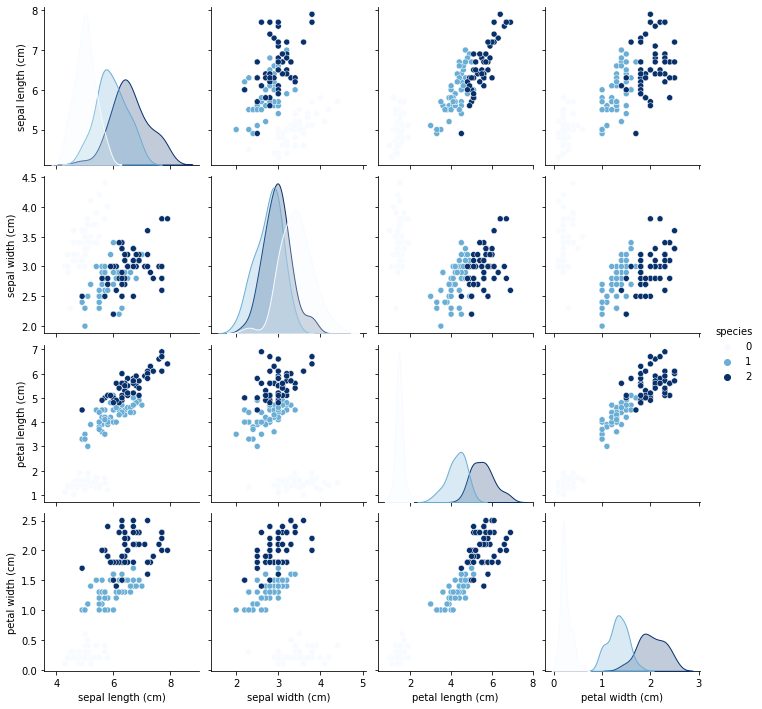

In [64]:
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1['species'] = iris.target
sns.pairplot(df1, hue='species', palette='Blues')

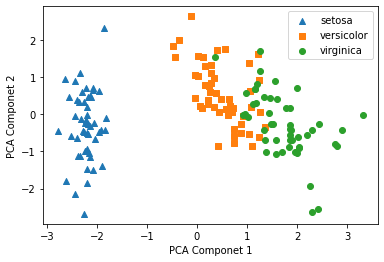

In [66]:
# PC1, PC2 시각화(품종별로 마커의 색깔과 모양을 달리해서 표현)
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df[df.species == i]['PC1']
    y_data = df[df.species == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('PCA Componet 1'), plt.ylabel('PCA Componet 2')
plt.show()

### 2. Scikit-learn으로 구하기

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [71]:
df.head()

,sl,sw,pl,pw,PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


In [73]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [74]:
pca.explained_variance_ratio_.sum()

0.9581320720000165

### 3.PCA 전후 분류

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2,
    random_state=2022

)

In [81]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9333333333333333

- PCA 데이터로 분류


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify=iris.target, test_size=0.2,
    random_state=2022

)
rfc2 = RandomForestClassifier(random_state=2022)
rfc2.fit(X_train, y_train)
rfc2.score(X_test, y_test)

0.8666666666666667